In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def hermite_curve(P0, P1, R0, R1, n_points=100):
    t = np.linspace(0, 1, n_points)
    h00 = 2 * t**3 - 3 * t**2 + 1
    h10 = t**3 - 2 * t**2 + t
    h01 = -2 * t**3 + 3 * t**2
    h11 = t**3 - t**2
    curve = (h00[:, None] * P0 + h10[:, None] * R0 + 
             h01[:, None] * P1 + h11[:, None] * R1)
    return curve


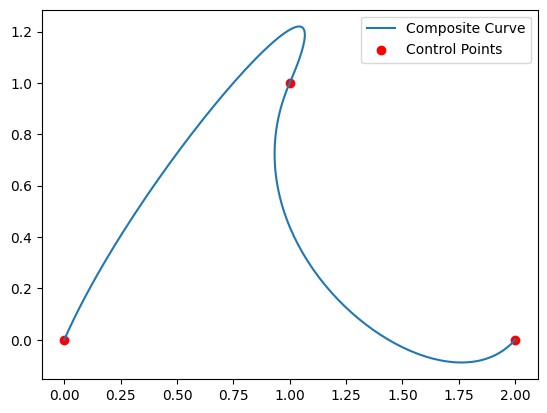

In [5]:
def composite_hermite_curve(points, tangents, n_points=100):
    curves = []
    for i in range(len(points) - 1):
        P0, P1 = points[i], points[i+1]
        R0, R1 = tangents[i], tangents[i+1]
        curves.append(hermite_curve(P0, P1, R0, R1, n_points))
    return np.vstack(curves)

# Esempio
points = [np.array([0, 0]), np.array([1, 1]), np.array([2, 0])]
tangents = [np.array([1, 2]), np.array([-1, -2]), np.array([1, 1])]
curve = composite_hermite_curve(points, tangents)

plt.plot(curve[:, 0], curve[:, 1], label="Composite Curve")
plt.scatter(*np.array(points).T, color='red', label='Control Points')
plt.legend()
plt.show()